In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rocki37/open-university-learning-analytics-dataset")

# print("Path to dataset files:", path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
font_path = 'C:\\Windows\\Fonts\\batang.TTC'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [3]:
studentinfo = pd.read_csv('./data/studentInfo.csv')
studentinfo



,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
# Create a new DataFrame containing only the specified columns
filtered_df = studentinfo[['studied_credits', 'id_student', 'code_module', 'imd_band', 'final_result', 'highest_education']].copy()
filtered_df
# # Display the first 5 rows of the new DataFrame
# print(filtered_df.head().to_markdown(index=False, numalign="left", stralign="left"))

,studied_credits,id_student,code_module,imd_band,final_result,highest_education
0,240,11391,AAA,90-100%,Pass,HE Qualification
1,60,28400,AAA,20-30%,Pass,HE Qualification
2,60,30268,AAA,30-40%,Withdrawn,A Level or Equivalent
3,60,31604,AAA,50-60%,Pass,A Level or Equivalent
4,60,32885,AAA,50-60%,Pass,Lower Than A Level
...,...,...,...,...,...,...
32588,30,2640965,GGG,10-20,Fail,Lower Than A Level
32589,30,2645731,GGG,40-50%,Distinction,Lower Than A Level
32590,30,2648187,GGG,20-30%,Pass,A Level or Equivalent
32591,30,2679821,GGG,90-100%,Withdrawn,Lower Than A Level


In [5]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   studied_credits    32593 non-null  int64 
 1   id_student         32593 non-null  int64 
 2   code_module        32593 non-null  object
 3   imd_band           31482 non-null  object
 4   final_result       32593 non-null  object
 5   highest_education  32593 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


In [6]:
# Find the most frequent value in the `IMD 밴드` column
most_frequent_value = filtered_df['imd_band'].mode()

most_frequent_value

0    20-30%
Name: imd_band, dtype: object

In [7]:
# Replace missing values in `IMD 밴드` with the most frequent value
filtered_df['imd_band'] = filtered_df['imd_band'].fillna('20-30%')

# Display the first 5 rows of the DataFrame
# print(filtered_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Check the number of missing values in the `IMD 밴드` column
# print(f"\nNumber of missing values in IMD 밴드: {filtered_df['imd_band'].isnull().sum()}")


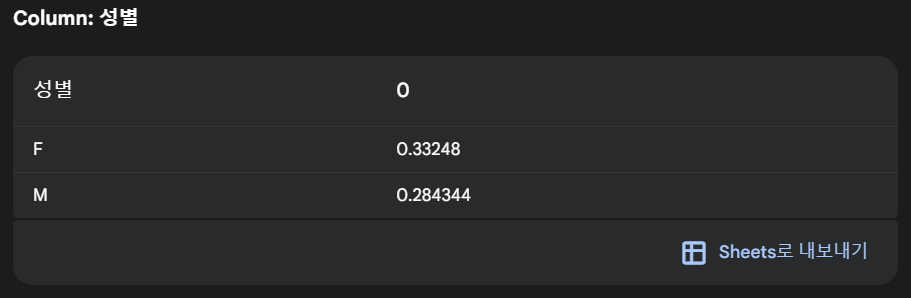

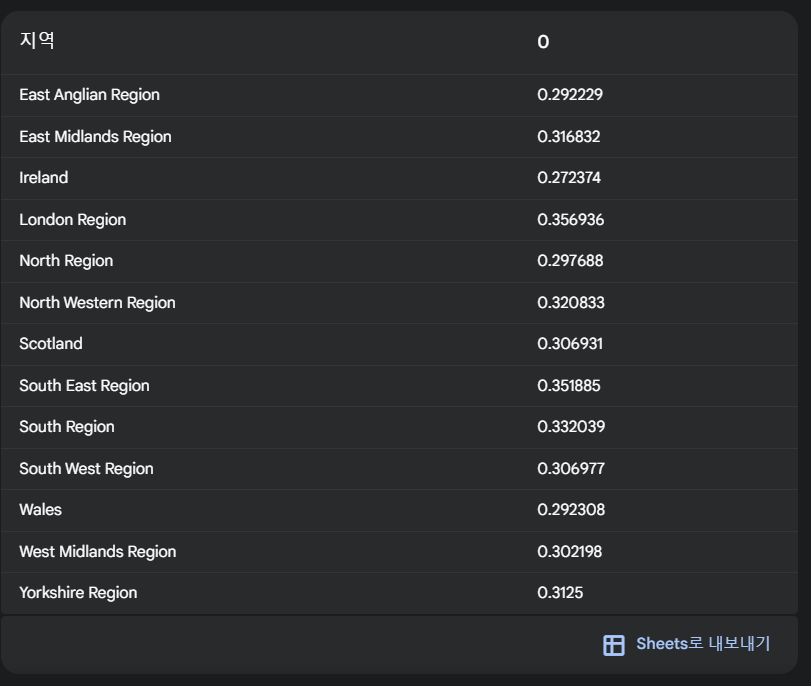

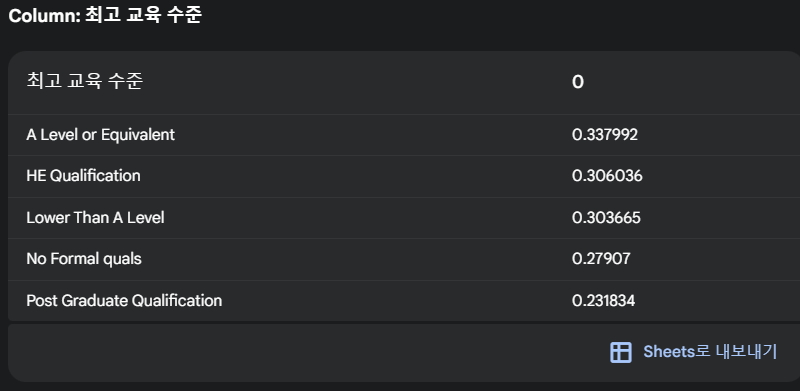

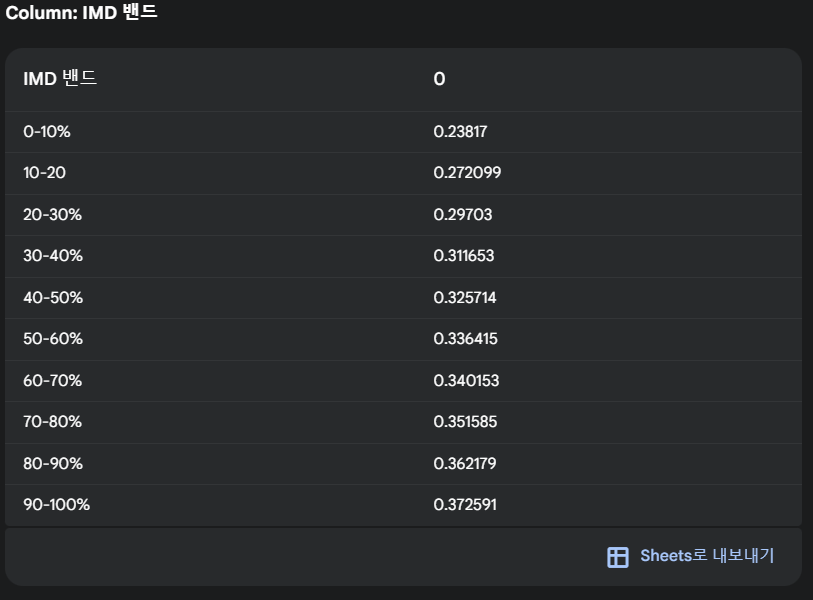

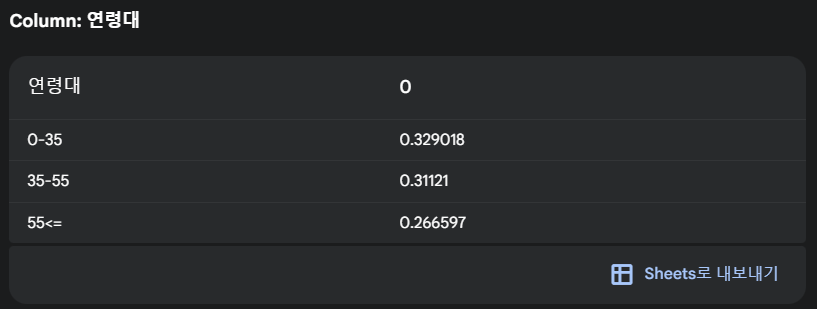

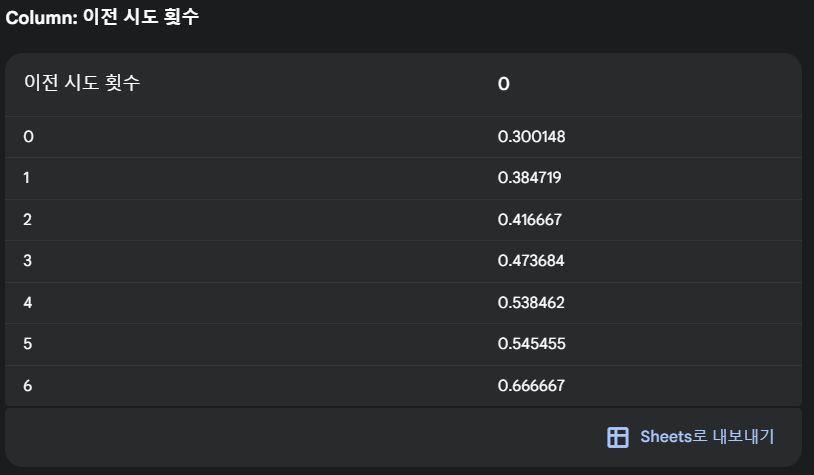

유의미한 경향성을 보임

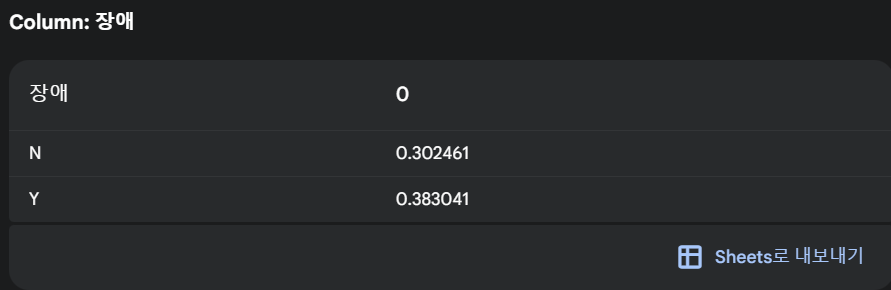

In [8]:
studentinfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [9]:
vle = pd.read_csv('./data/vle.csv')
vle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [10]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


week_from과 week_to는 결측치 많아서 제외

In [11]:
# Load the dataframes
studentInfo_df = pd.read_csv('./data/studentInfo.csv')[["id_student", "code_module", "highest_education", "studied_credits", "imd_band", "final_result"]]
studentRegistration_df = pd.read_csv('./data/studentRegistration.csv')[["id_student", "date_unregistration"]]
studentVle_df = pd.read_csv('./data/studentVle.csv')[["id_student", "sum_click", "date"]]
studentAssessment_df = pd.read_csv('./data/studentAssessment.csv')[["id_assessment","id_student", "score", "date_submitted"]]
assessments_df = pd.read_csv('./data/assessments.csv')[['date', 'weight','id_assessment']]

merged_data = pd.merge(studentInfo_df, studentRegistration_df, on='id_student', how='inner')
ass_merged_data = pd.merge(studentAssessment_df, assessments_df, on='id_assessment', how='inner')
final_merged_data = pd.merge(merged_data, ass_merged_data, on='id_student', how='inner')

final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279801 entries, 0 to 279800
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_student           279801 non-null  int64  
 1   code_module          279801 non-null  object 
 2   highest_education    279801 non-null  object 
 3   studied_credits      279801 non-null  int64  
 4   imd_band             267184 non-null  object 
 5   final_result         279801 non-null  object 
 6   date_unregistration  48181 non-null   float64
 7   id_assessment        279801 non-null  int64  
 8   score                279446 non-null  float64
 9   date_submitted       279801 non-null  int64  
 10  date                 273343 non-null  float64
 11  weight               279801 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 25.6+ MB


In [12]:
final_merged_data.isnull().sum()

id_student                  0
code_module                 0
highest_education           0
studied_credits             0
imd_band                12617
final_result                0
date_unregistration    231620
id_assessment               0
score                     355
date_submitted              0
date                     6458
weight                      0
dtype: int64

In [13]:
final_merged_data.to_csv('./data/merged_data.csv')

In [14]:
final_merged_data['imd_band'] = final_merged_data['imd_band'].fillna('20-30%')

In [15]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279801 entries, 0 to 279800
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_student           279801 non-null  int64  
 1   code_module          279801 non-null  object 
 2   highest_education    279801 non-null  object 
 3   studied_credits      279801 non-null  int64  
 4   imd_band             279801 non-null  object 
 5   final_result         279801 non-null  object 
 6   date_unregistration  48181 non-null   float64
 7   id_assessment        279801 non-null  int64  
 8   score                279446 non-null  float64
 9   date_submitted       279801 non-null  int64  
 10  date                 273343 non-null  float64
 11  weight               279801 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 25.6+ MB


In [16]:
final_merged_data['date_unregistration'] = final_merged_data['date_unregistration'].fillna(0)
final_merged_data = final_merged_data[final_merged_data['weight']!=100]
final_merged_data['imd_band'] = final_merged_data['imd_band'].fillna('20-30%')
final_merged_data['score'] = final_merged_data['score'].fillna(0)
final_merged_data.info()
final_merged_data.to_csv('./data/merged_data.csv', index=False)
final_merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 269484 entries, 0 to 279800
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_student           269484 non-null  int64  
 1   code_module          269484 non-null  object 
 2   highest_education    269484 non-null  object 
 3   studied_credits      269484 non-null  int64  
 4   imd_band             269484 non-null  object 
 5   final_result         269484 non-null  object 
 6   date_unregistration  269484 non-null  float64
 7   id_assessment        269484 non-null  int64  
 8   score                269484 non-null  float64
 9   date_submitted       269484 non-null  int64  
 10  date                 269484 non-null  float64
 11  weight               269484 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 26.7+ MB


,id_student,studied_credits,date_unregistration,id_assessment,score,date_submitted,date,weight
count,2.694840e+05,269484.000000,269484.000000,269484.000000,269484.000000,269484.000000,269484.000000,269484.000000
mean,7.044949e+05,80.047702,16.927832,27009.715564,75.038704,107.362337,123.051016,10.940429
std,5.497419e+05,38.979386,51.895966,7977.948137,19.532902,70.799757,77.185778,9.829573
min,6.516000e+03,30.000000,-365.000000,1752.000000,0.000000,-11.000000,12.000000,0.000000
25%,5.100700e+05,60.000000,0.000000,24287.000000,65.000000,46.000000,52.000000,1.000000
50%,5.856620e+05,60.000000,0.000000,25357.000000,79.000000,102.000000,117.000000,10.000000
75%,6.316800e+05,120.000000,0.000000,34880.000000,89.000000,164.000000,201.000000,20.000000
max,2.698588e+06,630.000000,444.000000,37443.000000,100.000000,608.000000,241.000000,35.000000


In [17]:
final_merged_data = final_merged_data.drop(columns=['date_unregistration', 'date_submitted'], axis=1)
final_merged_data


,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,date,weight
0,11391,AAA,HE Qualification,240,90-100%,Pass,1752,78.0,19.0,10.0
1,11391,AAA,HE Qualification,240,90-100%,Pass,1753,85.0,54.0,20.0
2,11391,AAA,HE Qualification,240,90-100%,Pass,1754,80.0,117.0,20.0
3,11391,AAA,HE Qualification,240,90-100%,Pass,1755,85.0,166.0,20.0
4,11391,AAA,HE Qualification,240,90-100%,Pass,1756,82.0,215.0,30.0
...,...,...,...,...,...,...,...,...,...,...
279796,2684003,GGG,HE Qualification,30,50-60%,Distinction,37437,60.0,173.0,0.0
279797,2684003,GGG,HE Qualification,30,50-60%,Distinction,37438,100.0,229.0,0.0
279798,2684003,GGG,HE Qualification,30,50-60%,Distinction,37439,60.0,229.0,0.0
279799,2684003,GGG,HE Qualification,30,50-60%,Distinction,37440,100.0,229.0,0.0


In [18]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269484 entries, 0 to 279800
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_student         269484 non-null  int64  
 1   code_module        269484 non-null  object 
 2   highest_education  269484 non-null  object 
 3   studied_credits    269484 non-null  int64  
 4   imd_band           269484 non-null  object 
 5   final_result       269484 non-null  object 
 6   id_assessment      269484 non-null  int64  
 7   score              269484 non-null  float64
 8   date               269484 non-null  float64
 9   weight             269484 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 22.6+ MB


In [19]:
# Create a dictionary with the new encodings
new_education_encodings = {
    'Post Graduate Qualification': 0,
    'HE Qualification': 1,
    'A Level or Equivalent': 2,
    'Lower Than A Level': 3,
    'No Formal quals': 4
}

# Apply the new encodings to the `highest_education` column
final_merged_data['highest_education'] = final_merged_data['highest_education'].map(new_education_encodings)

final_merged_data.head(5)

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,date,weight
0,11391,AAA,1,240,90-100%,Pass,1752,78.0,19.0,10.0
1,11391,AAA,1,240,90-100%,Pass,1753,85.0,54.0,20.0
2,11391,AAA,1,240,90-100%,Pass,1754,80.0,117.0,20.0
3,11391,AAA,1,240,90-100%,Pass,1755,85.0,166.0,20.0
4,11391,AAA,1,240,90-100%,Pass,1756,82.0,215.0,30.0


In [20]:
# Create a dictionary with the new encodings
new_final_result_encodings = {
    'Withdrawn': 0,
    'Distinction': 1,
    'Fail': 1,
    'Pass': 1
}

# Apply the new encodings to the `final_result` column
final_merged_data['final_result'] = final_merged_data['final_result'].map(new_final_result_encodings)

final_merged_data.head(20)



,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,date,weight
0,11391,AAA,1,240,90-100%,1,1752,78.0,19.0,10.0
1,11391,AAA,1,240,90-100%,1,1753,85.0,54.0,20.0
2,11391,AAA,1,240,90-100%,1,1754,80.0,117.0,20.0
3,11391,AAA,1,240,90-100%,1,1755,85.0,166.0,20.0
4,11391,AAA,1,240,90-100%,1,1756,82.0,215.0,30.0
5,28400,AAA,1,60,20-30%,1,1752,70.0,19.0,10.0
6,28400,AAA,1,60,20-30%,1,1753,68.0,54.0,20.0
7,28400,AAA,1,60,20-30%,1,1754,70.0,117.0,20.0
8,28400,AAA,1,60,20-30%,1,1755,64.0,166.0,20.0
9,28400,AAA,1,60,20-30%,1,1756,60.0,215.0,30.0


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
final_merged_data = final_merged_data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
categorical_columns = ["code_module", "imd_band",]
for col in categorical_columns:
    final_merged_data[col] = label_encoder.fit_transform(final_merged_data[col])

final_merged_data.head(50)


,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,date,weight
0,11391,0,1,240,9,1,1752,78.0,19.0,10.0
1,11391,0,1,240,9,1,1753,85.0,54.0,20.0
2,11391,0,1,240,9,1,1754,80.0,117.0,20.0
3,11391,0,1,240,9,1,1755,85.0,166.0,20.0
4,11391,0,1,240,9,1,1756,82.0,215.0,30.0
5,28400,0,1,60,2,1,1752,70.0,19.0,10.0
6,28400,0,1,60,2,1,1753,68.0,54.0,20.0
7,28400,0,1,60,2,1,1754,70.0,117.0,20.0
8,28400,0,1,60,2,1,1755,64.0,166.0,20.0
9,28400,0,1,60,2,1,1756,60.0,215.0,30.0


In [22]:
# 데이터 전처리 (범주형 데이터 -> 수치형 데이터로 변환)

# highest_education 컬럼은 교육 수준을 나타내는 범주형(문자형) 데이터 -> 수치형 데이터로 변환
new_education_encodings = {
    'Post Graduate Qualification': 0,
    'HE Qualification': 1,
    'A Level or Equivalent': 2,
    'Lower Than A Level': 3,
    'No Formal quals': 4
}

final_merged_data['highest_education'] = final_merged_data['highest_education'].map(new_education_encodings)

final_merged_data.head(5)

# final_result 컬럼을 이진 분류(Binary Classification) 형태로 변환.
# Withdrawn (중도 포기) → 0, 그 외 (Distinction, Fail, Pass) → 1
 #즉, 이탈 여부를 나타내는 새로운 변수로 변환:
# 0 = 학습 포기 (Withdrawn)
# 1 = 학습 지속 (Pass, Fail, Distinction)

new_final_result_encodings = {
    'Withdrawn': 0,
    'Distinction': 1,
    'Fail': 1,
    'Pass': 1
}

final_merged_data['final_result'] = final_merged_data['final_result'].map(new_final_result_encodings)

final_merged_data.head(20)

# ode_module과 imd_band는 범주형 변수, 따라서 이를 숫자로 변환하는 과정.        ex) code_module:        imd_band (소득 수준 그룹):
# LabelEncoder()를 사용하여 각각의 고유한 문자열을 숫자로 변환.                      "AAA" → 0          "0-10%" → 0
# fit_transform()을 사용하여 문자를 고유한 정수값으로 매핑.                         "BBB" → 1           "10-20%" → 1
#                                                                                "CCC" → 2           "20-30%" → 2
from sklearn.preprocessing import LabelEncoder

# 데이터 복사
final_merged_data = final_merged_data.copy()

# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 범주형 변수에 Label Encoding 적용
categorical_columns = ["code_module", "imd_band",]
for col in categorical_columns:
    final_merged_data[col] = label_encoder.fit_transform(final_merged_data[col])

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report
from scipy.stats import randint

# 1. 데이터 로드
data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=['final_result']).to_numpy().astype(np.float64)
y = data['final_result'].to_numpy()

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 (랜덤 포레스트는 필요 없지만 일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
X_test_scaled = scaler.transform(X_test).astype(np.float64)

# 5. 기본 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# 6. 성능 평가 (기본 모델)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
r2 = r2_score(y_test, y_pred)

print(f"\n=== 기본 Random Forest 성능 ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"R2 Score: {r2:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 20),  # 2부터 20까지의 정수 중에서 랜덤하게 선택
    'min_samples_leaf': randint(1, 20),   # 1부터 20까지의 정수 중에서 랜덤하게 선택
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train_scaled, y_train)

# 8. 최적의 하이퍼파라미터 및 성능 확인
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("\n=== 하이퍼파라미터 최적화 후 Random Forest 성능 ===")
print(f"Best Parameters: {best_params}")

# 9. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
print(f"Best R2 Score: {r2_best:.4f}")

# 10. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Withdrawn', 'Withdrawn'], yticklabels=['Not Withdrawn', 'Withdrawn'])
plt.title("Confusion Matrix - Random Forest (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Feature Importance 시각화
feature_importances = pd.Series(best_model.feature_importances_, index=data.drop(columns=['final_result']).columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


=== 기본 Random Forest 성능 ===
Accuracy: 0.9465
F1 Score: 0.9447
R2 Score: 0.5363

Confusion Matrix:
[[ 3576  1344]
 [  634 31430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      4920
           1       0.96      0.98      0.97     32064

    accuracy                           0.95     36984
   macro avg       0.90      0.85      0.88     36984
weighted avg       0.94      0.95      0.94     36984



KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 1. 데이터 로드
data = pd.read_csv("./data/merged_data_cleaned.csv")

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=["final_result"]).to_numpy().astype(np.float64)
y = data["final_result"].to_numpy()

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. 스케일링 (일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
X_test_scaled = scaler.transform(X_test).astype(np.float64)

# 5. Gradient Boosting 모델 학습
gb_model = GradientBoostingClassifier(random_state=42)

# 6. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    "n_estimators": [100, 200],  # 트리 개수
    "learning_rate": [0.1, 0.2],  # 학습률
    "max_depth": [3, 5],  # 트리의 최대 깊이
    "subsample": [0.8, 1.0],  # 샘플링 비율
}

grid_search = GridSearchCV(
    gb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2
)
grid_search.fit(X_train_scaled, y_train)

# 7. 최적의 하이퍼파라미터 및 성능 확인
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n=== 최적의 Gradient Boosting 모델 ===")
print(f"Best Parameters: {best_params}")

# 8. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average="weighted")

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# 9. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Withdrawn", "Withdrawn"],
    yticklabels=["Not Withdrawn", "Withdrawn"],
)
plt.title("Confusion Matrix - Gradient Boosting (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Feature Importance 시각화
feature_importances = pd.Series(
    best_model.feature_importances_, index=data.drop(columns=["final_result"]).columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scipy.stats import randint

# 1. 데이터 로드
data = pd.read_csv("./data/merged_data_cleaned.csv")

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=["final_result"]).to_numpy().astype(np.float64)
y = data["final_result"].to_numpy()

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. 스케일링 (일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
X_test_scaled = scaler.transform(X_test).astype(np.float64)

# 5. Gradient Boosting 모델 학습 및 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
param_grid = {
    "n_estimators": [100, 200],  # 트리 개수
    "learning_rate": [0.1, 0.2],  # 학습률
    "max_depth": [3, 5],  # 트리의 최대 깊이
    "subsample": [0.8, 1.0],  # 샘플링 비율
}

# n_iter를 줄여서 탐색 공간 축소
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=8,  # 탐색 횟수 감소
    cv=3,  # 교차 검증 횟수 감소
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
random_search.fit(X_train_scaled, y_train)

# 6. 최적의 하이퍼파라미터 및 성능 확인
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("\n=== 최적의 Gradient Boosting 모델 ===")
print(f"Best Parameters: {best_params}")

# 7. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average="weighted")

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'squared_error', 'friedman_mse'}. Got 'gini' instead.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'friedman_mse', 'squared_error'}. Got 'gini' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'squared_error', 'friedman_mse'}. Got 'entropy' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'friedman_mse', 'squared_error'}. Got 'entropy' instead.


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from scipy.stats import randint

# 1. 데이터 로드
data = pd.read_csv("./data/merged_data_cleaned.csv")

# 2. 데이터 준비 (X: Feature, y: Target)
X = data.drop(columns=["final_result"]).to_numpy().astype(np.float64)
y = data["final_result"].to_numpy()

# 3. 학습 데이터와 테스트 데이터 분리 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. 스케일링 (일관성을 위해 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float64)
X_test_scaled = scaler.transform(X_test).astype(np.float64)

# 5. Gradient Boosting 모델 학습 및 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
param_dist = {
    "n_estimators": [100, 125 ,150 ,175, 200],  # 트리 개수
    "learning_rate": [0.01, 0.1, 0.2],  # 학습률
    "max_depth": [3, 5, 7],  # 트리의 최대 깊이
    "subsample": [0.8, 0.9, 1.0],  # 샘플링 비율
}

# n_iter를 줄여서 탐색 공간 축소
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=8,  # 탐색 횟수 감소
    cv=3,  # 교차 검증 횟수 감소
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42,
)
random_search.fit(X_train_scaled, y_train)

# 6. 최적의 하이퍼파라미터 및 성능 확인
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("\n=== 최적의 Gradient Boosting 모델 ===")
print(f"Best Parameters: {best_params}")

# 7. 최적 모델 평가
y_pred_best = best_model.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average="weighted")

print(f"Best Accuracy: {acc_best:.4f}")
print(f"Best F1 Score: {f1_best:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 8 candidates, totalling 24 fits

=== 최적의 Gradient Boosting 모델 ===
Best Parameters: {'subsample': 1.0, 'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.2}
Best Accuracy: 0.8982
Best F1 Score: 0.8788

Confusion Matrix:
[[ 1574  3346]
 [  420 31644]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.32      0.46      4920
           1       0.90      0.99      0.94     32064

    accuracy                           0.90     36984
   macro avg       0.85      0.65      0.70     36984
weighted avg       0.89      0.90      0.88     36984

